# Introducción a scikit-learn (1) - Crea un modelo para calcular el número de pie a partir de la altura

### 1. Generación el conjunto de datos
Vamos a crear un conjunto de datos sintético para 1000 personas que represente la relación entre la altura de una persona y el tamaño de su pie, y luego construye un modelo de regresión lineal simple para predecir el tamaño del pie basándonos en la altura. Se pide lo siguiente:

1. Variables
  * **Altura (cm)**: Altura de la persona.
  * **Tamaño del pie (EU)**: Tamaño del zapato según el sistema europeo.
2. Suposiciones
  * La relación entre altura y tamaño del pie es aproximadamente lineal.
  * Usaremos una distribución normal para simular la altura y el tamaño del pie con una cierta relación lineal y algo de ruido aleatorio para hacerlo más realista.
3. Creación de Datos
  * La altura media será de 170 cm con una desviación estándar de 10 cm.
  * El tamaño del pie lo consideraremos entero, aumentará aproximadamente 1 tamaño de zapato por cada 10 cm de aumento en la altura.
  * Consideraremos un tamaño base de 38 + 1 tamaño por cada 10 cm por encima de 160 cm + ruido (entre -2 y 2).

---

Podemos generar la altura usando `np.random.normal` con una media de 170 cm y una desviación estándar de 10 cm.

El tamaño del pie sigue una fórmula:
* El tamaño base es de 38.
* A esa base se le suma un valor por cada 10 cm de altura $ \frac{numerador}{10} $.
* Si es por cada 10 cm por encima de 160 cm, entonces sería $ \frac{Altura - 160}{10} $.
* Y nos quedaría el ruido, un generador que usa intervalos de ruido es `np.random.uniform` que distribuye los datos uniformemente en un intervalo abierto `[low, high)`. [Enlace de consulta](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html)

La fórmula resultante sería:

$
Pie = 38 + \frac{Altura - 160}{10} + Ruido(-2, 2, 1000)
$

A estos valores se redondearían al tamaño de pie más próximo para reflejar el calzado real.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

HEIGHT_MEAN, HEIGHT_STD = 170, 10

SAMPLES = 1000
BASE = 38
SEMILLA = 18

np.random.seed(SEMILLA)

# Generar alturas
heights = np.random.normal(HEIGHT_MEAN, HEIGHT_STD, SAMPLES)

# Generar números de pie
feet_numbers = BASE + (heights - 160) / 10 + np.random.uniform(-2, 2, SAMPLES)
feet_numbers = np.round(feet_numbers)
# feet_numbers = np.round(pie*2)/2 # Para añadir los 'y medio'

# Guardamos los datos en un DataFrame
data = pd.DataFrame({'heights': heights, 'feet_numbers': feet_numbers})
data

,heights,feet_numbers
0,170.794284,38.0
1,191.902024,40.0
2,168.651079,37.0
3,171.605180,38.0
4,174.426978,40.0
...,...,...
995,169.629534,40.0
996,171.577220,39.0
997,179.828084,38.0
998,171.957002,37.0


### 2. Visualización los datos

Una vez hemos generado los datos, lo siguiente será hacer una visualización correcta de los datos en donde se vea claramente la relación entre la altura y el nº de pie. Visualizaremos los datos con nubes de puntos con `matplotlib`.

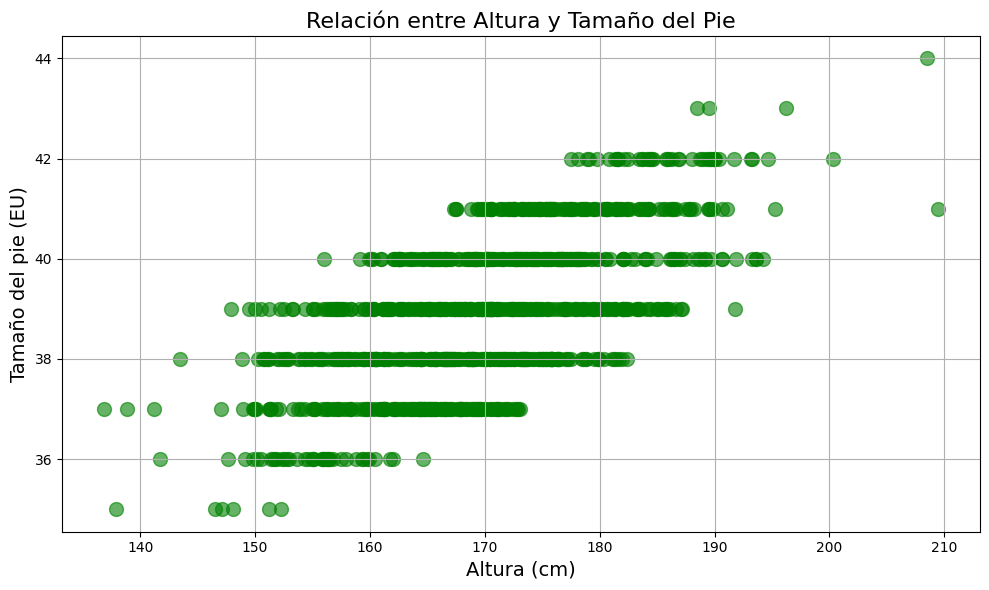

In [2]:
# Configuración del gráfico (diagrama de dispersión)
# El gráfico se ajusta para tener un tamaño adecuado
plt.figure(figsize=(10, 6))
plt.scatter(data['heights'], data['feet_numbers'], c='g', alpha=0.6, s=100)

plt.title('Relación entre Altura y Tamaño del Pie', fontsize=16)
plt.xlabel('Altura (cm)', fontsize=14)
plt.ylabel('Tamaño del pie (EU)', fontsize=14)

plt.grid(True)

plt.tight_layout()

# plt.yticks(np.arange(min(pie), max(pie)+1, 1)) # Mostrar todos los números

plt.show()

### 3. Divide los datos entre entrenamiento y test

Una vez hemos visualizado los datos, se hará la matriz de características con las alturas y el array objetivo con el nº de pie. Esto hará que tengamos nuestros datos de entrenamiento y de test.

In [3]:
# Importamos train_test_split
from sklearn.model_selection import train_test_split

X = data[['heights']]
y = data['feet_numbers']

# División de los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

### 4. Creación del modelo

Lo siguiente será buscar un modelo adecuado para entrenarlo con nuestros datos, para nuestro caso usaremos el modelo `LinearRegression`. Ponemos el hiperparámetro `fit_intercept` a `True` para que calcule la intersección del modelo. Por defecto viene a `True`. [Más información](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LinearRegression.html).

$y = a \cdot x +b$

In [4]:
# Importamos el modelo LinearRegression
import sklearn.linear_model as lm

modelo = lm.LinearRegression(fit_intercept=True)
modelo.fit(X_train, y_train)

LinearRegression()

### 5. Test del modelo

Una vez hemos entrenado nuestro modelo con los datos, es hora de probarlo. La librería `scikit-learn` ofrece distintas pruebas para verificar que nuestro modelo ha sido entrenado correctamente. Podemos usar:

* Error Cuadrático Medio (MSE): Mide la media de los errores cuadráticos entre las predicciones y los valores reales. A menor valor de MSE, mejor es el ajuste del modelo.
* Coeficiente de Determinación ($R^2$): Mide qué tan bien el modelo predice los resultados. Un valor cercano a 1 indica que el modelo explica casi toda la variabilidad de la variable dependiente.
* Error Absoluto Medio (MAE): Mide el error absoluto promedio entre las predicciones y los valores reales. Es útil para obtener una idea de la magnitud del error en las unidades originales.

In [5]:
# Importamos las pruebas de sklearn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Usamos predict. OJO: HAY QUE REDONDEAR!!!
y_pred = np.round(modelo.predict(X_test))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {round(mse, 2)}")
print(f"R-cuadrado (R2): {round(r2, 2)}")
print(f"Error absoluto medio (MAE): {round(mae, 2)}")

Error cuadrático medio (MSE): 1.55
R-cuadrado (R2): 0.35
Error absoluto medio (MAE): 1.02


In [6]:
y_pred_or = modelo.predict(X_test)

print(f"MSE: {round(mean_squared_error(y_test, y_pred_or), 2)}")
print(f"R2: {round(r2_score(y_test, y_pred_or), 2)}")
print(f"MAE: {round(mean_absolute_error(y_test, y_pred_or), 2)}")

MSE: 1.45
R2: 0.4
MAE: 1.04


In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        35.0       0.00      0.00      0.00         2
        36.0       0.00      0.00      0.00         7
        37.0       0.29      0.14      0.19        37
        38.0       0.27      0.28      0.27        47
        39.0       0.21      0.46      0.29        39
        40.0       0.24      0.23      0.24        39
        41.0       0.33      0.13      0.19        23
        42.0       0.00      0.00      0.00         5
        43.0       0.00      0.00      0.00         0
        44.0       0.00      0.00      0.00         1

    accuracy                           0.24       200
   macro avg       0.13      0.12      0.12       200
weighted avg       0.24      0.24      0.22       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Los resultados indican que nuestro modelo tiene un desempeño de tan solo un 35% según $R^2$. Mientras que el MSE y el MAE son bastante altos.

#### Opcional: Gráfico de dispersión entre los datos de test y los esperados

Podemos hacer una gráfica para comparar los resultados del modelos con los reales de nuestra muestra. Si los puntos están más cerca de la línea dibujada con `plot`, es que nuestro modelo tiene un buen ajuste.

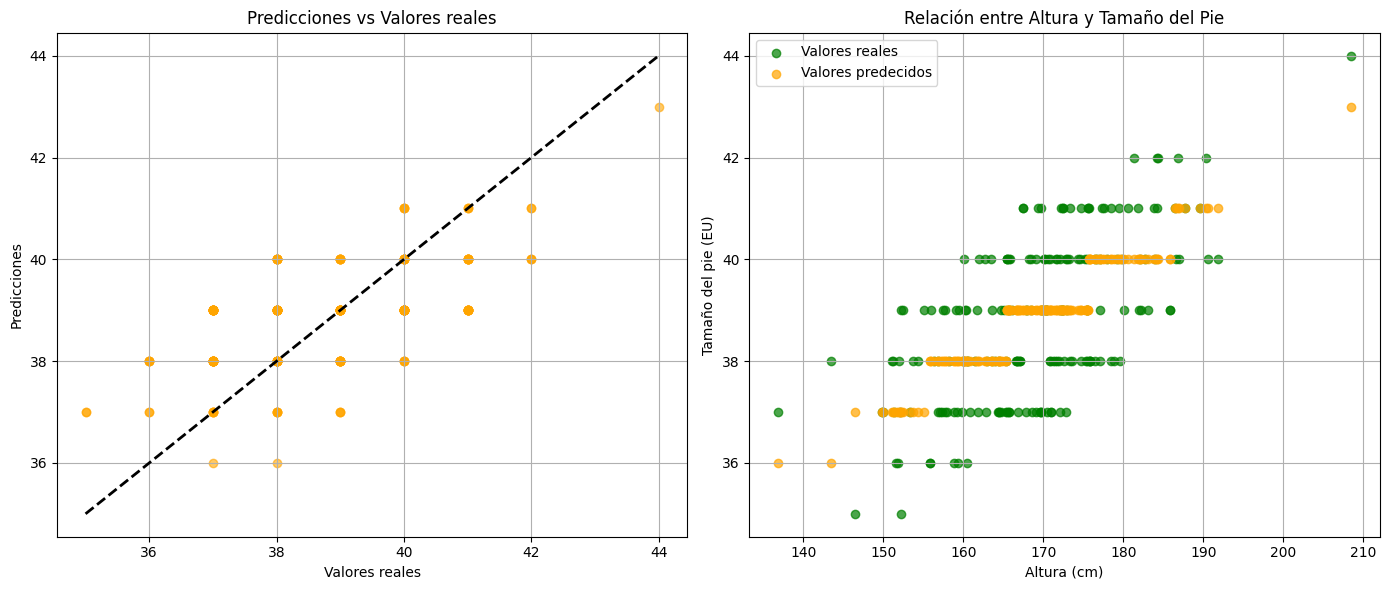

In [ ]:
plt.figure(figsize=(14, 6))
COLORS = ['green', 'orange']
LABELS = ['Valores reales', 'Valores predecidos']
Y_TYPES = [y_test, y_pred]

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, c='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.grid(True)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')

plt.subplot(1, 2, 2)
for i, label in enumerate(LABELS):
    plt.scatter(X_test['heights'], Y_TYPES[i], label=label, c=COLORS[i], alpha=0.7)

plt.title('Relación entre Altura y Tamaño del Pie')
plt.xlabel('Altura (cm)')
plt.ylabel('Tamaño del pie (EU)')

plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

Podemos ver claramente que los puntos están bastante alejados de la línea, lo que indicaría que nuestro modelo necesitaría ser ajustado para que los puntos estuvierán más cerca. Algunas formas para mejorar el modelo serían añadir más características, transformaciones polinómicas, ajustar hiperparámetros entre muchas otras.